# SST in Hurricane Irene
  
* Modified by C. Gentemann for GHRSST Science Team Tutorial 2019, Rome, Italy
* Modified by C. Gentemann for OceanHackWeek 2019, Seattle, WA
* PODAACPY file search added by Lewis John McGibbney
  

-------------------

## Import python packages

You are going to want numpy, pandas, matplotlib.pyplot, podaaacpy, and xarray

In [10]:
import warnings
warnings.simplefilter('ignore') # filter some warning messages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

from pathlib import Path
import configparser
from lxml import objectify

#for search capabilites import podaacpy
import podaac.podaac as podaac
from podaac import drive as podaacdrive
import podaac.podaac_utils as putil
# then create an instance of the Podaac class
p = podaac.Podaac()
with open('./podaac.ini', 'r') as f:
    config = configparser.ConfigParser()
    config.read_file(f)
    d = podaacdrive.Drive(None, 
                          config['drive']['urs_username'], 
                          config['drive']['urs_password'])

## Analysis of SSTs during Hurricane Irene

Irene was a massive storm, with tropical storm force winds extending outward 300 miles (485 km). The storm was also slow moving as it traversed the Mid-Atlantic. Irene claimed at least 48 lives and caused over 7 billion U.S. dollars in damages in the U.S. and 3.1 billion U.S. dollars of damage in the Caribbean. (source: https://www.ncdc.noaa.gov/sotc/tropical-cyclones/201113).

For this tutorial we will use the podaacpy to search for SST2 during Hurricane Irene and look at the change in upper ocean heat content

In [39]:
start_time = '2011-08-24T00:00:00Z'
end_time = '2011-09-01T23:59:59Z'

#dataset_id = 'PODAAC-GHCMC-4FM03'  #CMC SST looked up on podaac website
#dataset_id = 'PODAAC-GHGMR-4FJ04'  #MUR SST looked up on podaac website
#dataset_id = 'PODAAC-GHGDM-4FD02'  #DMI


dataset_id = 'PODAAC-GHCMC-4FM02'  #DMI SST
gresult = p.granule_search(dataset_id=dataset_id,
                           start_time=start_time,
                           end_time=end_time,
                           items_per_page='100')
urls = putil.PodaacUtils.mine_opendap_urls_from_granule_search(gresult)
urls_sst = [w[:-5] for w in urls]  #remove html from urlsurls_sst = [w.replace('-tools.jpl.nasa.gov/drive/files/', '-opendap.jpl.nasa.gov/opendap/') for w in urls_sst]
print('num files:',len(urls_sst))

dataset_id = 'PODAAC-GHOST-4FK01' #ostia sst
gresult = p.granule_search(dataset_id=dataset_id,
                           start_time=start_time,
                           end_time=end_time,
                           items_per_page='100')
urls = putil.PodaacUtils.mine_opendap_urls_from_granule_search(gresult)
urls_ostia = [w[:-5] for w in urls]  #remove html from urlsurls_sst = [w.replace('-tools.jpl.nasa.gov/drive/files/', '-opendap.jpl.nasa.gov/opendap/') for w in urls_sst]
print('num files:',len(urls_ostia))


num files: 10
num files: 10
['https://podaac-opendap.jpl.nasa.gov/opendap/allData/ghrsst/data/L4/GLOB/UKMO/OSTIA/2011/235/20110823-UKMO-L4HRfnd-GLOB-v01-fv02-OSTIA.nc.bz2', 'https://podaac-opendap.jpl.nasa.gov/opendap/allData/ghrsst/data/L4/GLOB/UKMO/OSTIA/2011/236/20110824-UKMO-L4HRfnd-GLOB-v01-fv02-OSTIA.nc.bz2', 'https://podaac-opendap.jpl.nasa.gov/opendap/allData/ghrsst/data/L4/GLOB/UKMO/OSTIA/2011/237/20110825-UKMO-L4HRfnd-GLOB-v01-fv02-OSTIA.nc.bz2', 'https://podaac-opendap.jpl.nasa.gov/opendap/allData/ghrsst/data/L4/GLOB/UKMO/OSTIA/2011/238/20110826-UKMO-L4HRfnd-GLOB-v01-fv02-OSTIA.nc.bz2', 'https://podaac-opendap.jpl.nasa.gov/opendap/allData/ghrsst/data/L4/GLOB/UKMO/OSTIA/2011/239/20110827-UKMO-L4HRfnd-GLOB-v01-fv02-OSTIA.nc.bz2', 'https://podaac-opendap.jpl.nasa.gov/opendap/allData/ghrsst/data/L4/GLOB/UKMO/OSTIA/2011/240/20110828-UKMO-L4HRfnd-GLOB-v01-fv02-OSTIA.nc.bz2', 'https://podaac-opendap.jpl.nasa.gov/opendap/allData/ghrsst/data/L4/GLOB/UKMO/OSTIA/2011/241/20110829-UKMO-

In [12]:
ds_sst = xr.open_dataset(urls_sst[0])
subset_sst = ds_sst.sel(lat=slice(15,45),lon=slice(-100,-40))
print('opening:', urls_sst[0],subset_sst)
#subset_sst.analysed_sst.plot()

opening: https://podaac-opendap.jpl.nasa.gov/opendap/allData/ghrsst/data/GDS2/L4/GLOB/CMC/CMC0.2deg/v2/2011/235/20110823120000-CMC-L4_GHRSST-SSTfnd-CMC0.2deg-GLOB-v02.0-fv02.0.nc <xarray.Dataset>
Dimensions:           (lat: 151, lon: 301, time: 1)
Coordinates:
  * time              (time) datetime64[ns] 2011-08-23T12:00:00
  * lat               (lat) float32 15.0 15.2 15.4 15.6 ... 44.4 44.6 44.8 45.0
  * lon               (lon) float32 -100.0 -99.8 -99.6 ... -40.4 -40.2 -40.0
Data variables:
    analysed_sst      (time, lat, lon) float32 ...
    analysis_error    (time, lat, lon) float32 ...
    sea_ice_fraction  (time, lat, lon) float32 ...
    mask              (time, lat, lon) float32 ...
Attributes:
    Conventions:                CF-1.4
    title:                      CMC 0.2 deg global sea surface temperature an...
    summary:                    Applies the method of statistical interpolati...
    references:                 Brasnett B. 2008. The impact of satellite ret...
    

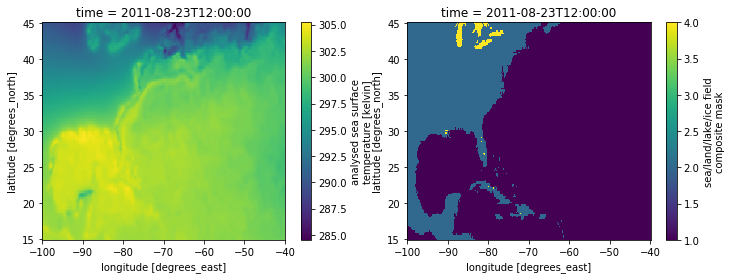

In [13]:
fig, axes = plt.subplots(ncols=2,figsize=[12,4])

subset_sst.analysed_sst.plot(ax=axes[0])

subset_sst.mask.plot(ax=axes[1])

## Mask out land values using .where

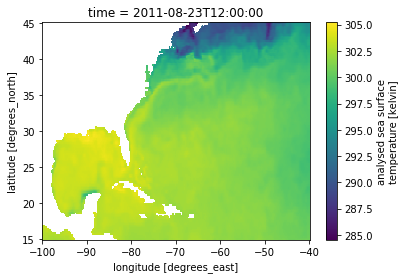

In [14]:
subset_sst_masked = subset_sst.where(subset_sst.mask==1)

subset_sst_masked.analysed_sst.plot()

## Compare time series of the cold wake after Hurricane as measured by MUR and OSTIA SSTs

## When you open a multi-file dataset, xarray uses dask for lasy loading.  
* Lazy loading: It mostly just loads the metadata. You can do data searching, selecting, subsetting without acutally loading the data. 
* Here we have loaded in 30 days of data for two very high resolution SST global datasets.  Before we actually load the data, we are going to want to do some subsetting so that it will fit into our memory.
* Notice below when you print out the dataset details that they are all stored as dask.array types.

In [34]:
ds_sst = xr.open_mfdataset(urls_sst,coords='minimal')

ds_sst_ostia = xr.open_mfdataset(urls_ostia,coords='minimal')

ds_sst_ostia['time'] = ds_sst_ostia.indexes['time'].to_datetimeindex()

ds_sst = ds_sst.where(ds_sst.mask==1)


In [35]:
#subset data
subset_sst = ds_sst.sel(lat=slice(15,45),lon=slice(-100,-40))

subset_sst_ostia = ds_sstlo.sel(lat=slice(15,45),lon=slice(-100,-40))

In [36]:
subset_sst.load()
subset_sst_ostia.load()

<xarray.Dataset>
Dimensions:           (lat: 600, lon: 1200, time: 10)
Coordinates:
  * lat               (lat) float32 15.025 15.075 15.125 ... 44.925 44.975
  * lon               (lon) float32 -99.975 -99.925 -99.875 ... -40.075 -40.025
  * time              (time) datetime64[ns] 2011-08-23T12:00:00 ... 2011-09-01T12:00:00
Data variables:
    analysed_sst      (time, lat, lon) float32 302.97 302.97 ... 295.35 295.37
    analysis_error    (time, lat, lon) float32 0.75 0.75 0.76 ... 1.3 1.3 1.29
    sea_ice_fraction  (time, lat, lon) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    mask              (time, lat, lon) float32 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0
Attributes:
    Conventions:            CF-1.0
    title:                  OSTIA Sea Surface Temperature and Sea Ice Analysis
    DSD_entry_id:           UKMO-L4HRfnd-GLOB-OSTIA
    references:             None
    institution:            UK Met Office
    contact:                servicedesk@myocean.eu.org
    GDS_version_id:         v1.0-

In [37]:

#first interpolate onto same time sampling
subset_sst_interp_time = subset_sst.interp(time=subset_sst_ostia.time,
                                      method='linear')

#now interpolate onto same spatial grid
subset_sst_interp = subset_sst_interp_time.interp(lat=subset_sst_ostia.lat,
                                      lon=subset_sstlo.lon,
                                      method='nearest')

#now mask the data
subset_sstlo_masked = subset_sstlo.where(subset_sst_interp.mask==1)



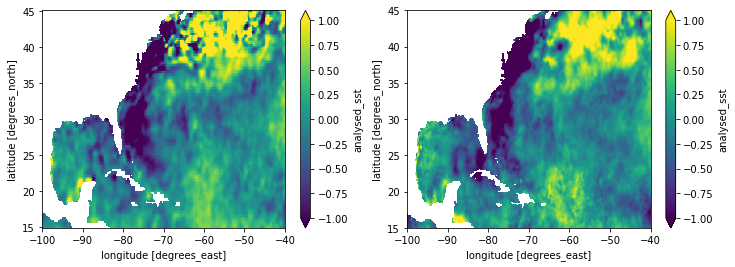

In [38]:
fig, axes = plt.subplots(ncols=2,figsize=[12,4])

dif = (subset_sst.analysed_sst[-1,:,:]-subset_sst.analysed_sst[0,:,:])

dif.plot(vmin=-1,vmax=1,ax=axes[0])

dif2 = (subset_sst_ostia_masked.analysed_sst[-1,:,:]-subset_sst_ostia_masked.analysed_sst[0,:,:])

dif2.plot(vmin=-1,vmax=1,ax=axes[1])



In [55]:
ds_chl = xr.open_dataset('https://coastwatch.pfeg.noaa.gov/erddap/griddap/pmlEsaCCI31OceanColorDaily')\
                        .rename({'latitude':'lat','longitude':'lon'}) 
#ds_chl = ds_chl.sortby(ds_chl.lat)
#print(ds_chl)
ds_chl = ds_chl.sel(time=slice('2011-08-14','2011-09-01'),lat=slice(45,15),lon=slice(-100,-40))
ds_chl

<xarray.Dataset>
Dimensions:             (lat: 720, lon: 1440, time: 19)
Coordinates:
  * time                (time) datetime64[ns] 2011-08-14 ... 2011-09-01
  * lat                 (lat) float32 44.979168 44.9375 ... 15.0625 15.020833
  * lon                 (lon) float32 -99.979164 -99.9375 ... -40.020832
Data variables:
    MODISA_nobs         (time, lat, lon) float32 ...
    VIIRS_nobs          (time, lat, lon) float32 ...
    MERIS_nobs          (time, lat, lon) float32 ...
    SeaWiFS_nobs        (time, lat, lon) float32 ...
    total_nobs          (time, lat, lon) float32 ...
    Rrs_412             (time, lat, lon) float32 ...
    Rrs_443             (time, lat, lon) float32 ...
    Rrs_490             (time, lat, lon) float32 ...
    Rrs_510             (time, lat, lon) float32 ...
    Rrs_555             (time, lat, lon) float32 ...
    Rrs_670             (time, lat, lon) float32 ...
    water_class1        (time, lat, lon) float32 ...
    water_class2        (time, lat, lon